In [54]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
% matplotlib inline
dtype = torch.FloatTensor

In [2]:
# 3 Words Sentence
sentences = [ "i like dog", "i like cat", "i like animal",
              "dog cat animal", "apple cat dog like", "dog fish milk like",
              "dog cat eyes like", "i like apple", "apple i hate",
              "apple i movie book music like", "cat dog hate", "cat dog like"]

In [3]:
word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

In [4]:
# Word2Vec Parameter
batch_size = 20  # To show 2 dim embedding graph
embedding_size = 2  # To show 2 dim embedding graph
voc_size = len(word_list)

In [5]:
word_list

['dog',
 'fish',
 'apple',
 'eyes',
 'hate',
 'movie',
 'i',
 'animal',
 'book',
 'like',
 'music',
 'cat',
 'milk']

In [6]:
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]])  # target
        random_labels.append(data[i][1])  # context word

    return random_inputs, random_labels


In [9]:
# Make skip gram of one size window
skip_grams = []
for i in range(1, len(word_sequence) - 1):
    target = word_dict[word_sequence[i]]
    context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]

    for w in context:
        skip_grams.append([target, w])

In [21]:
skip_grams

[[9, 6],
 [9, 0],
 [0, 9],
 [0, 6],
 [6, 0],
 [6, 9],
 [9, 6],
 [9, 11],
 [11, 9],
 [11, 6],
 [6, 11],
 [6, 9],
 [9, 6],
 [9, 7],
 [7, 9],
 [7, 0],
 [0, 7],
 [0, 11],
 [11, 0],
 [11, 7],
 [7, 11],
 [7, 2],
 [2, 7],
 [2, 11],
 [11, 2],
 [11, 0],
 [0, 11],
 [0, 9],
 [9, 0],
 [9, 0],
 [0, 9],
 [0, 1],
 [1, 0],
 [1, 12],
 [12, 1],
 [12, 9],
 [9, 12],
 [9, 0],
 [0, 9],
 [0, 11],
 [11, 0],
 [11, 3],
 [3, 11],
 [3, 9],
 [9, 3],
 [9, 6],
 [6, 9],
 [6, 9],
 [9, 6],
 [9, 2],
 [2, 9],
 [2, 2],
 [2, 2],
 [2, 6],
 [6, 2],
 [6, 4],
 [4, 6],
 [4, 2],
 [2, 4],
 [2, 6],
 [6, 2],
 [6, 5],
 [5, 6],
 [5, 8],
 [8, 5],
 [8, 10],
 [10, 8],
 [10, 9],
 [9, 10],
 [9, 11],
 [11, 9],
 [11, 0],
 [0, 11],
 [0, 4],
 [4, 0],
 [4, 11],
 [11, 4],
 [11, 0],
 [0, 11],
 [0, 9]]

## Model

In [46]:
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()

        # W and WT is not Traspose relationship
        self.W = nn.Parameter(-2 * torch.rand(voc_size, embedding_size) + 1).type(dtype) # voc_size > embedding_size Weight
        self.WT = nn.Parameter(-2 * torch.rand(embedding_size, voc_size) + 1).type(dtype) # embedding_size > voc_size Weight

    def forward(self, X):
        # X : [batch_size, voc_size]
        hidden_layer = torch.matmul(X, self.W) # hidden_layer : [batch_size, embedding_size]
        output_layer = torch.matmul(hidden_layer, self.WT) # output_layer : [batch_size, voc_size]
        return output_layer

model = Word2Vec()

In [47]:
model

Word2Vec()

In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr = 0.001)

In [49]:
input_batch, target_batch = random_batch(skip_grams,batch_size)

In [50]:
input_batch = torch.Tensor(input_batch)

In [51]:
input_batch

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        

In [52]:
output = model(input_batch)

## Training

In [53]:
for epoch in range(5000):
    
    input_batch, target_batch = random_batch(skip_grams,batch_size)
    
    input_batch = Variable(torch.Tensor(input_batch))
    target_batch = Variable(torch.LongTensor(target_batch))
    
    optimizer.zero_grad()
    output = model(input_batch)
    
    # output : [batch_size, voc_size], target: [batch_size] (LongTensor, not one_hot)
    loss = criterion(output, target_batch)
    if (epoch + 1)%1000 ==0:
        print('Epoch:','04%d'%(epoch+1),'cost = ','{:.6f}'.format(loss))
        
    loss.backward()
    optimizer.step()

Epoch: 041000 cost =  2.551819
Epoch: 042000 cost =  2.236077
Epoch: 043000 cost =  1.527986
Epoch: 044000 cost =  2.160802
Epoch: 045000 cost =  1.617037


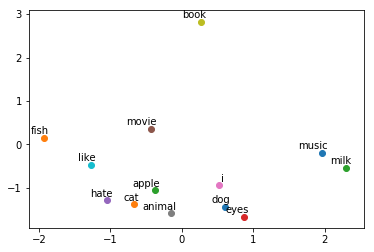

In [55]:
for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x,y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()